In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler
from qiskit.circuit import Parameter
from qiskit.circuit import QuantumCircuit
from qiskit_machine_learning.algorithms import QSVC

In [5]:
data = np.genfromtxt('data.txt', delimiter=' ')
features = data[:, :4]
labels = data[:, 4]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [9]:
samp = Sampler()
fid = ComputeUncompute(sampler=samp)

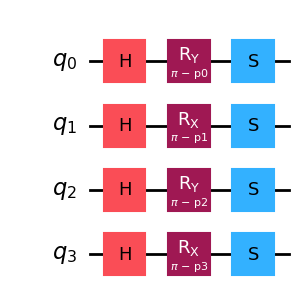

In [48]:
param1 = Parameter("p0")
param2 = Parameter("p1")
param3 = Parameter("p2")
param4 = Parameter("p3")

no_ent = QuantumCircuit(4)
    
for i in range(4):
    no_ent.h(i)
no_ent.ry(np.pi - param1, 0)
no_ent.ry(np.pi - param3, 2) 
no_ent.rx(np.pi - param2, 1) 
no_ent.rx(np.pi - param4, 3)
for i in range(4):
    no_ent.s(i)
no_ent.draw()

In [49]:
no_ent_ker = FidelityQuantumKernel(fidelity=fid, feature_map=no_ent)
model1 = QSVC(quantum_kernel=no_ent_ker)
model1.fit(x_train, y_train)
score = model1.score(x_test, y_test)
print("classification score = ", score)

classification score =  0.625


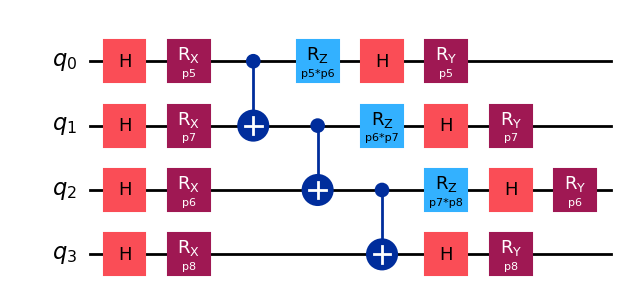

In [62]:
param5 = Parameter("p5")
param6 = Parameter("p6")
param7 = Parameter("p7")
param8 = Parameter("p8")

parameters = [param5,param6,param7,param8]

p_ent = QuantumCircuit(4)
    
for i in range(4):
    p_ent.h(i)
p_ent.rx(param5, 0)
p_ent.rx(param6, 2) 
p_ent.rx(param7, 1) 
p_ent.rx(param8, 3)

for i in range(0,3):
    p_ent.cx(i,i+1)
    p_ent.rz(parameters[i+1]*parameters[i],i)

for i in range(4):
    p_ent.h(i)
    
p_ent.ry(param5, 0)
p_ent.ry(param6, 2) 
p_ent.ry(param7, 1) 
p_ent.ry(param8, 3)

p_ent.draw()

In [64]:
p_ent_ker = FidelityQuantumKernel(fidelity=fid, feature_map=p_ent)
model2 = QSVC(quantum_kernel=p_ent_ker)
model2.fit(x_train, y_train)
score = model2.score(x_test, y_test)
print("classification score = ", score)

classification score =  1.0


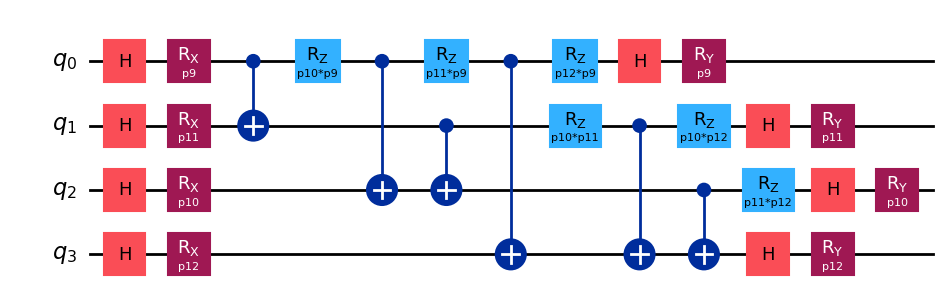

In [59]:
param9 = Parameter("p9")
param10 = Parameter("p10")
param11 = Parameter("p11")
param12 = Parameter("p12")

parameters = [param9,param10,param11,param12]

f_ent = QuantumCircuit(4)
    
for i in range(4):
    f_ent.h(i)
f_ent.rx(param9, 0)
f_ent.rx(param10, 2) 
f_ent.rx(param11, 1) 
f_ent.rx(param12, 3)

for i in range(0,3):
    for j in range(i+1,4):
        f_ent.cx(i,j)
        f_ent.rz(parameters[i]*parameters[j],i)

for i in range(4):
    f_ent.h(i)
    
f_ent.ry(param9,0)
f_ent.ry(param10, 2) 
f_ent.ry(param11, 1) 
f_ent.ry(param12, 3)

f_ent.draw()

In [60]:
f_ent_ker = FidelityQuantumKernel(fidelity=fid, feature_map=f_ent)
model3 = QSVC(quantum_kernel=f_ent_ker)
model3.fit(x_train, y_train)
score = model3.score(x_test, y_test)
print("classification score = ", score)

classification score =  1.0


In [57]:
data2 = np.genfromtxt('test.txt', delimiter=' ')  
features = data2[:, :4]

In [65]:
print("predictions for model with no entanglement \n")
print(model1.predict(features))
print("predictions for model with partial entanglement \n")
print(model2.predict(features))
print("predictions for model with full entanglement \n")
print(model3.predict(features))

predictions for model with no entanglement 

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
predictions for model with partial entanglement 

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1.]
predictions for model with full entanglement 

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1.]
